# Projeto 1 - Ciência dos Dados

Nome: Pedro De Lucca Sartori Chagas Ferro

Nome: Pedro Antônio Braga Dutra

___
Carregando algumas bibliotecas:

In [184]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [185]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Pedro De Lucca\Documents\Insper\2° Semestre\CDados\22-2a-cd-p1-grupo_pedrolscf\notebooks


In [186]:
filename = 'dados.xlsx'

In [187]:
train = pd.read_excel(filename, sheet_name = 'Treinamento')
train.head(5)

,Categoria,Titulo,Descrição,Data,Pagina,Target,P_Chave
0,bolsonaro,"Após repercussão, site com críticas ao preside...","Após a repercussão, o domínio ‘bolsonaro.com.b...",01/09/2022 15:50,1,0,crítica e acusações sobre a família bolsonaro
1,bolsonaro,Bolsonaro chama de narrativa críticas de compo...,O presidente Jair Bolsonaro (PL) atribuiu a um...,01/09/2022 20:56,1,0,ataques à jornalista
2,bolsonaro,"Lula cai dois pontos, Bolsonaro fica estável, ...",Uma nova pesquisa Datafolha presidencial foi d...,01/09/2022 21:42,1,0,NaN
3,bolsonaro,"Datafolha: Entre mulheres, Lula tem 48%, Bolso...",A pesquisa do Instituto Datafolha divulgada ne...,01/09/2022 22:01,1,0,protagonizou agressão verbal à jornalista vera
4,bolsonaro,Lula diz que orçamento de Bolsonaro não prevê ...,O ex-presidente e candidato Luiz Inácio Lula d...,01/09/2022 22:24,1,0,não inclui reajuste do salário mínimo


In [188]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Categoria,Titulo,Descrição,Data,Pagina,Target,P_Chave
0,bolsonaro,Bolsonaro critica TSE e diz que medidas da Cor...,O presidente Jair Bolsonaro (PL) fez críticas ...,02/09/2022 15:30,1,0,críticas TSE
1,bolsonaro,"Esquerda se solidarizou com facada em 2018, ao...",Diferentemente do que disse o presidente Jair ...,02/09/2022 17:48,1,0,contrário diferentemente Bolsonaro
2,bolsonaro,Bolsonaro cometeu crime contra a humanidade na...,O júri simbólico do Tribunal Permanente dos Po...,01/09/2022 14:08,2,0,condenou crime sentença Bolsonaro
3,bolsonaro,Crítico de Bolsonaro compra domínio e ‘recria’...,Um site que antes era usado para exibir feitos...,31/08/2022 12:21,2,0,críticas Bolsonaro presidente ameaça Brasil
4,bolsonaro,Bolsonaro cometeu crime contra a humanidade na...,O júri simbólico do Tribunal Permanente dos Po...,01/09/2022 14:08,2,0,condenou crime sentença Bolsonaro


___
## Classificador automático

Vamos analisar, neste código, 800 notícias do site IstoÉ Dinheiro sobre o Governo Bolsonaro a fim de identificar seu desempenho com base no que é veiculado pela mídia. Para isso, classificamos nossa base de dados em 3 categorias, atribuindo os Targets 0 às notícias consideradas Negativas, 1 às consideradas Positivas e 2 às Neutras. Dessa maneira, o Target 0 representa escândalos (prisão, investigação, etc), troca deliberada de agentes dos 3 Poderes, indícios de governabilidade deficitária, relatos de oposição a recomendações de orgãos mundiais e baixa eficiência de políticas externas ou internas. Em contraponto, o Target 1 expressa notícias sobre boas práticas de governança, manutenção do bom relacionamento político externo e interno, adoção de medidas eficientes e/ou que se mostraram promissoras, inovações, criação e aprimoramento de benefícios sociais e parcerias. É importante notar que tanto 0 quanto 1 foram atribuídos somente a notícias relacionadas diretamente à governança do Presidente. Ao que não foi possível agrupar em 0 e 1, aplicou-se o Target 2.

# Criando O Classificador

In [189]:
import re 


def limpador(text):
    punctuation = '[!-.:?;%()‘’“”/]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    text_subbed = text_subbed.lower()
    return text_subbed

In [190]:
train['P_Chave']=train['P_Chave'].astype(str)
train['Titulo']=train['Titulo'].astype(str)
train['Descrição']=train['Descrição'].astype(str)

train['Descrição']=train['Descrição'].apply(limpador)
train['Titulo']=train['Titulo'].apply(limpador)
train['P_Chave']=train['P_Chave'].apply(limpador)

In [191]:
test['P_Chave']=test['P_Chave'].astype(str)
test['Titulo']=test['Titulo'].astype(str)
test['Descrição']=test['Descrição'].astype(str)

test['Descrição']=test['Descrição'].apply(limpador)
test['Titulo']=test['Titulo'].apply(limpador)
test['P_Chave']=test['P_Chave'].apply(limpador)

In [192]:
train0_tit=train.loc[train['Target']==0,['Titulo','Target']]
train1_tit=train.loc[train['Target']==1,['Titulo','Target']]
train2_tit=train.loc[train['Target']==2,['Titulo','Target']]

In [193]:
excluidos=['[…]','nan','–','de','a','o','e','na','no','do','em','ao','da','é','à','os','nas','nos','das','que',
          'dos','as','r','se','para', '', 'como', 'com', 'um', 'nesta', 'diz', 'uma', 'por', 'foi', 'vai', 'após', 'durante',
          'ele', 'ela', 'pelo', 'pela', 'segundafeira', 'terçafeira', 'quartafeira', 'quintafeira', 'sextafeira', 
          'sábado', 'domingo', 'são', 'ser','jair','presidente','bolsonaro']

#### Tratando O DataFrame TRAIN

In [194]:
train_tit=train.iloc[:,[1,5]]

# Analisando os Títulos (TRAIN)

### Lista dos NEGATIVOS (0)

In [195]:
lista_train0_tit=[]
lista_train0_tit_quero=[]
for i in range(0,len(train0_tit)):
    quero=train0_tit.iloc[i,0]
    final = quero.split()
    lista_train0_tit+=(final)
w=0
while w <len(lista_train0_tit):
    if lista_train0_tit[w] not in excluidos:
        lista_train0_tit_quero.append(lista_train0_tit[w])
    w+=1

### Lista dos POSITIVOS (1)

In [196]:
lista_train1_tit=[]
lista_train1_tit_quero=[]
for i in range(0,len(train1_tit)):
    quero=train1_tit.iloc[i,0]
    final = quero.split()
    lista_train1_tit+=(final)
w=0
while w <len(lista_train1_tit):
    if lista_train1_tit[w] not in excluidos:
        lista_train1_tit_quero.append(lista_train1_tit[w])
    w+=1

### Lista dos NEUTROS (2)

In [197]:
lista_train2_tit=[]
lista_train2_tit_quero=[]
for i in range(0,len(train2_tit)):
    quero=train2_tit.iloc[i,0]
    final = quero.split()
    lista_train2_tit+=(final)
w=0
while w <len(lista_train2_tit):
    if lista_train2_tit[w] not in excluidos:
        lista_train2_tit_quero.append(lista_train2_tit[w])
    w+=1

### Transformando para Serie

In [198]:
serie0_tit=pd.Series(lista_train0_tit_quero).value_counts()
serie1_tit=pd.Series(lista_train1_tit_quero).value_counts()
serie2_tit=pd.Series(lista_train2_tit_quero).value_counts()

#print(lista_train1_tit_quero)

## Testando Iterações

In [199]:
len0 = len(serie0_tit)
len1 = len(serie1_tit)
len2 = len(serie2_tit)

if len0 < len1 and len0 < len2:
    serie1_tit = serie1_tit.to_frame()
    serie1_tit = serie1_tit.iloc[0:len0,:]
    serie2_tit = serie2_tit.to_frame()
    serie2_tit = serie2_tit.iloc[0:len0,:]
elif len1 < len2:
    serie0_tit = serie0_tit.to_frame()
    serie0_tit = serie0_tit.iloc[0:len1,:]
    serie2_tit = serie2_tit.to_frame()
    serie2_tit = serie2_tit.iloc[0:len0,:]
else:
    serie0_tit = serie0_tit.to_frame()
    serie0_tit = serie0_tit.iloc[0:len2,:]
    serie1_tit = serie1_tit.to_frame()
    serie1_tit = serie1_tit.iloc[0:len0,:]

serie0_tit = serie0_tit.squeeze()
serie1_tit = serie1_tit.squeeze()
serie2_tit = serie2_tit.squeeze()

In [200]:
for palavra in lista_train0_tit_quero:
    if palavra not in serie0_tit.index:
        lista_train0_tit_quero.remove(palavra)

for palavra in lista_train1_tit_quero:
    if palavra not in serie1_tit.index:
        lista_train1_tit_quero.remove(palavra)
    
for palavra in lista_train2_tit_quero:
    if palavra not in serie2_tit.index:
        lista_train2_tit_quero.remove(palavra)

# Analisando Probabilidades

In [201]:
tam0=len(train0_tit)
tam1=len(train1_tit)
tam2=len(train2_tit)
total= tam0 + tam1 + tam2

prob0=tam0/total
prob1=tam1/total
prob2=tam2/total

print(f'Probabilidade NEGATIVAS/TOTAL: {float(prob0):.5f}')
print(f'Probabilidade POSITIVAS/TOTAL: {float(prob1):.5f}')
print(f'Probabilidade NEUTRAS/TOTAL: {float(prob2):.5f}')

Probabilidade NEGATIVAS/TOTAL: 0.21875
Probabilidade POSITIVAS/TOTAL: 0.26667
Probabilidade NEUTRAS/TOTAL: 0.51458


# Analisando o Desempenho do Classificador

In [202]:
test['Auto_Target']='Vazio'
test_tit=test.loc[:,['Titulo','Target','Auto_Target']]

In [203]:
test['Auto_Target']='Vazio'
test_tit=test.loc[:,['Titulo','Target','Auto_Target']]

In [204]:
neutro = positivo = negativo = 0
contagem_0 = len(lista_train0_tit_quero)
contagem_1 = len(lista_train1_tit_quero)
contagem_2 = len(lista_train2_tit_quero)

lista_total = lista_train2_tit_quero + lista_train1_tit_quero + lista_train0_tit_quero
conta_palavras = []
for i in range(0, len(lista_total)):
    palavra = lista_total[i]
    if palavra not in conta_palavras:
        conta_palavras.append(palavra)
universo = len(conta_palavras)


for i in range(0, len(test_tit)):

    frases = ''
    lista_splits = []
    probFraseDado0 = 0
    probFraseDado1 = 0
    probFraseDado2 = 0

    frases += test_tit.iloc[i,0]
    lista_splits = frases.split()

    for w in range(0, len(lista_splits)):
        palavra = lista_splits[w]
        if palavra in serie0_tit.index.to_list():
            if probFraseDado0 == 0:
                probFraseDado0 = (serie0_tit[palavra]+1) / (contagem_0 + universo)
            else:
                probFraseDado0 *= (serie0_tit[palavra]+1) / (contagem_0 + universo)
        else:
            if probFraseDado0 == 0:
                probFraseDado0 = 1 / (contagem_0 + universo)
            else:
                probFraseDado0 *= 1 / (contagem_0 + universo)
        if palavra in serie1_tit.index.to_list():
            if probFraseDado1 == 0:
                probFraseDado1 = (serie1_tit[palavra]+1) / (contagem_1 + universo)
            else:
                probFraseDado1 *= (serie1_tit[palavra]+1) / (contagem_1 + universo)
        else:
            if probFraseDado1 == 0:
                probFraseDado1 = 1 / (contagem_1 + universo)
            else:
                probFraseDado1 *= 1 / (contagem_1 + universo)
        if palavra in serie2_tit.index.to_list():
            if probFraseDado2 == 0:
                probFraseDado2 *= (serie2_tit[palavra]+1) / (contagem_2 + universo)
            else:
                probFraseDado2 *= (serie2_tit[palavra]+1) / (contagem_2 + universo)
        else:
            if probFraseDado2 == 0:
                probFraseDado2 = 1 / (contagem_2 + universo)
            else:
                probFraseDado2 *= 1 / (contagem_2 + universo)

    prob0DadoFrase = probFraseDado0 * prob0
    prob1DadoFrase = probFraseDado1 * prob1
    prob2DadoFrase = probFraseDado2 * prob2

    if float(prob0DadoFrase) > float(prob1DadoFrase) and float(prob0DadoFrase) > float(prob2DadoFrase):
        negativo += 1
        test_tit.iloc[i, 2] = 0

    elif float(prob1DadoFrase) > float(prob2DadoFrase):
        positivo += 1
        test_tit.iloc[i, 2] = 1

    else:
        neutro += 1
        test_tit.iloc[i, 2] = 2


In [205]:
print(f'Bot NEGATIVO: {negativo}')
print(f'Bot POSITIVO: {positivo}')
print(f'Bot NEUTRO: {neutro}')

Bot NEGATIVO: 94
Bot POSITIVO: 84
Bot NEUTRO: 142


In [206]:
falso0 = 0
falso1 = 0
falso2 = 0

verd0=0
verd1=0
verd2=0

for i in range(0, len(test_tit)):
    if test_tit.iloc[i, 1] != test_tit.iloc[i, 2]:
        if test_tit.iloc[i, 2] == 0:
            falso0 += 1
        elif test_tit.iloc[i, 2] == 1:
            falso1 += 1
        else:
            falso2 += 1
    else:
        if test_tit.iloc[i, 2] == 0:
            verd0 += 1
        elif test_tit.iloc[i, 2] == 1:
            verd1 += 1
        else:
            verd2 += 1
        
print(f'Bot FAKE NEGATIVO: {falso0/len(test_tit)*100:.2f}%')
print(f'Bot FAKE POSITIVO: {falso1/len(test_tit)*100:.2f}%')
print(f'Bot FAKE NEUTRO: {falso2/len(test_tit)*100:.2f}%')
print(30*'-')
print(f'Bot VERDADEIRO NEGATIVO: {verd0/len(test_tit)*100:.2f}%')
print(f'Bot VERDADEIRO POSITIVO: {verd1/len(test_tit)*100:.2f}%')
print(f'Bot VERDADEIRO NEUTRO: {verd2/len(test_tit)*100:.2f}%')

Bot FAKE NEGATIVO: 20.62%
Bot FAKE POSITIVO: 13.44%
Bot FAKE NEUTRO: 9.69%
------------------------------
Bot VERDADEIRO NEGATIVO: 8.75%
Bot VERDADEIRO POSITIVO: 12.81%
Bot VERDADEIRO NEUTRO: 34.69%


In [207]:
acuracia = 1- (falso0 + falso1 + falso2) / len(test)

print(f'A ACURÁCIA encontrada foi de aproximadamente {acuracia*100}%')

A ACURÁCIA encontrada foi de aproximadamente 56.25%


In [151]:
test_tit.head(10)

,Titulo,Target,Auto_Target
0,bolsonaro critica tse e diz que medidas da cor...,0,0
1,esquerda se solidarizou com facada em 2018 ao ...,0,2
2,bolsonaro cometeu crime contra a humanidade na...,0,0
3,crítico de bolsonaro compra domínio e recria s...,0,0
4,bolsonaro cometeu crime contra a humanidade na...,0,0
5,pgr defende prorrogar investigação de bolsonar...,0,0
6,consultorias de orçamento discordam de veto à ...,0,0
7,entrevista de bolsonaro a jn tem panelaços em ...,0,2
8,lula tem 47 contra 32 de bolsonaro diz datafolha,2,2
9,bolsonaro passou ao centrão área com licitação...,0,0


# Matriz de Confusão

In [152]:
from sklearn import metrics
lista_target=[]
lista_auto_target=[]

for j in range(0,len(test_tit)):
    eu=test_tit.iloc[j,1]
    bot=test_tit.iloc[j,2]
    lista_target.append(eu)
    lista_auto_target.append(bot)



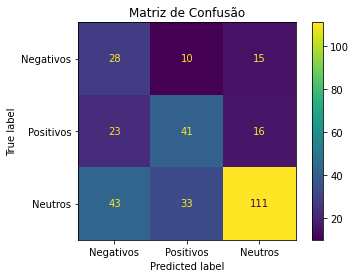

In [153]:
confusion_matrix_tit=metrics.confusion_matrix(lista_target,lista_auto_target)
cm_display_tit=metrics.ConfusionMatrixDisplay(confusion_matrix_tit,display_labels=['Negativos','Positivos','Neutros'])
cm_display_tit.plot()
plt.title('Matriz de Confusão')
plt.show()

___
### Concluindo

##### Utilizando o método das 'Stop Words'

É importante ressaltar que todas as palavras inclusas na lista de excluídos são irrelevantes para nossa análise, e em alguns casos, diminui a performance do classificador. Puxando como exemplo os três últimos itens ('jair','presidente' e 'bolsonaro') foi visto que a retirada dessas palavras aumentou a acurácia final do classificador, uma vez que em todas às categorias (POSITIVO, NEGATIVO e NEUTRO) essas apareciam com maior frequência. 

##### Iterações

Para uma melhor performance, foi preciso analisar todas as categorias (POSITIVO, NEGATIVO e NEUTRO) a partir de uma base de dados simétrica, ou seja, todas as listas de categorias foram filtradas com o intuito de possuírem o mesmo tamanho. Com isso, conseguimos uniformizar a classificação e por consequência aumentar a acurácia. 

##### Outras Considerações

O classficador não alcançou a acurácia desejada, pode-se dizer que foi mediana. Um dos possíveis motivos pode estar relacionado a quantidade de notícias NEUTRAS, uma vez que sua probabilidade ficou por volta de 50% (considerando os targets manuais). Por que tantas neutras? Bom, a base de dados foi obtida no início de setembro de 2022, logo às notícias enfatizaram assuntos relacionadas ao período eleitoral. Tal tema, foi classificado como NEUTRO, já que queremos analisar o desempenho do GOVERNO e não da popularidade do mesmo. 

# Finalizando

### Criando uma função para calcular a acurácia com base nos dados anteriores

In [208]:
def calc_acuracia (base_train, base_test):

    train0_tit = base_train.loc[base_train['Target']==0,['Titulo','Target']]
    train1_tit = base_train.loc[base_train['Target']==1,['Titulo','Target']]
    train2_tit = base_train.loc[base_train['Target']==2,['Titulo','Target']]

    excluidos=['[…]','nan','–','de','a','o','e','na','no','do','em','ao','da','é','à','os','nas','nos','das','que',
          'dos','as','r','se','para', '', 'como', 'com', 'um', 'nesta', 'diz', 'uma', 'por', 'foi', 'vai', 'após', 'durante',
          'ele', 'ela', 'pelo', 'pela', 'segundafeira', 'terçafeira', 'quartafeira', 'quintafeira', 'sextafeira', 
          'sábado', 'domingo', 'são', 'ser','jair','presidente','bolsonaro']

    # LISTA DOS NEGATIVOS
    lista_train0_tit=[]
    lista_train0_tit_quero=[]
    for i in range(0,len(train0_tit)):
        quero=train0_tit.iloc[i,0]
        final = quero.split()
        lista_train0_tit+=(final)
    w=0
    while w <len(lista_train0_tit):
        if lista_train0_tit[w] not in excluidos:
            lista_train0_tit_quero.append(lista_train0_tit[w])
        w+=1

    # LISTA DOS POSITIVOS
    lista_train1_tit=[]
    lista_train1_tit_quero=[]
    for i in range(0,len(train1_tit)):
        quero=train1_tit.iloc[i,0]
        final = quero.split()
        lista_train1_tit+=(final)
    w=0
    while w <len(lista_train1_tit):
        if lista_train1_tit[w] not in excluidos:
            lista_train1_tit_quero.append(lista_train1_tit[w])
        w+=1

    # LISTA DOS NEUTROS
    lista_train2_tit=[]
    lista_train2_tit_quero=[]
    for i in range(0,len(train2_tit)):
        quero=train2_tit.iloc[i,0]
        final = quero.split()
        lista_train2_tit+=(final)
    w=0
    while w <len(lista_train2_tit):
        if lista_train2_tit[w] not in excluidos:
            lista_train2_tit_quero.append(lista_train2_tit[w])
        w+=1

    # TRANSFORMANDO PARA SERIE
    serie0_tit=pd.Series(lista_train0_tit_quero).value_counts()
    serie1_tit=pd.Series(lista_train1_tit_quero).value_counts()
    serie2_tit=pd.Series(lista_train2_tit_quero).value_counts()

    # ITERANDO
    len0 = len(serie0_tit)
    len1 = len(serie1_tit)
    len2 = len(serie2_tit)

    if len0 < len1 and len0 < len2:
        serie1_tit = serie1_tit.to_frame()
        serie1_tit = serie1_tit.iloc[0:len0,:]
        serie2_tit = serie2_tit.to_frame()
        serie2_tit = serie2_tit.iloc[0:len0,:]
    elif len1 < len2:
        serie0_tit = serie0_tit.to_frame()
        serie0_tit = serie0_tit.iloc[0:len1,:]
        serie2_tit = serie2_tit.to_frame()
        serie2_tit = serie2_tit.iloc[0:len0,:]
    else:
        serie0_tit = serie0_tit.to_frame()
        serie0_tit = serie0_tit.iloc[0:len2,:]
        serie1_tit = serie1_tit.to_frame()
        serie1_tit = serie1_tit.iloc[0:len0,:]

    serie0_tit = serie0_tit.squeeze()
    serie1_tit = serie1_tit.squeeze()
    serie2_tit = serie2_tit.squeeze()

    for palavra in lista_train0_tit_quero:
        if palavra not in serie0_tit.index:
            lista_train0_tit_quero.remove(palavra)

    for palavra in lista_train1_tit_quero:
        if palavra not in serie1_tit.index:
            lista_train1_tit_quero.remove(palavra)
        
    for palavra in lista_train2_tit_quero:
        if palavra not in serie2_tit.index:
            lista_train2_tit_quero.remove(palavra)

    # ANALISANDO PROBABILIDADES DOS TARGETS
    tam0=len(train0_tit)
    tam1=len(train1_tit)
    tam2=len(train2_tit)
    total= tam0 + tam1 + tam2

    prob0=tam0/total
    prob1=tam1/total
    prob2=tam2/total

    contagem_0 = len(lista_train0_tit_quero)
    contagem_1 = len(lista_train1_tit_quero)
    contagem_2 = len(lista_train2_tit_quero)

    # CALCULO PARA AUTO_TARGET
    neutro = positivo = negativo = 0
    contagem_0 = len(lista_train0_tit_quero)
    contagem_1 = len(lista_train1_tit_quero)
    contagem_2 = len(lista_train2_tit_quero)

    lista_total = lista_train2_tit_quero + lista_train1_tit_quero + lista_train0_tit_quero
    conta_palavras = []
    for i in range(0, len(lista_total)):
        palavra = lista_total[i]
        if palavra not in conta_palavras:
            conta_palavras.append(palavra)
    universo = len(conta_palavras)

    for i in range(0, len(base_test)):
        frases = ''
        lista_splits = []
        probFraseDado0 = 0
        probFraseDado1 = 0
        probFraseDado2 = 0
        frases += base_test.iloc[i,0]
        lista_splits = frases.split()
        for w in range(0, len(lista_splits)):
            palavra = lista_splits[w]
            if palavra in serie0_tit.index.to_list():
                if probFraseDado0 == 0:
                    probFraseDado0 = (serie0_tit[palavra]+1) / (contagem_0 + universo)
                else:
                    probFraseDado0 *= (serie0_tit[palavra]+1) / (contagem_0 + universo)
            else:
                if probFraseDado0 == 0:
                    probFraseDado0 = 1 / (contagem_0 + universo)
                else:
                    probFraseDado0 *= 1 / (contagem_0 + universo)
            if palavra in serie1_tit.index.to_list():
                if probFraseDado1 == 0:
                    probFraseDado1 = (serie1_tit[palavra]+1) / (contagem_1 + universo)
                else:
                    probFraseDado1 *= (serie1_tit[palavra]+1) / (contagem_1 + universo)
            else:
                if probFraseDado1 == 0:
                    probFraseDado1 = 1 / (contagem_1 + universo)
                else:
                    probFraseDado1 *= 1 / (contagem_1 + universo)
            if palavra in serie2_tit.index.to_list():
                if probFraseDado2 == 0:
                    probFraseDado2 *= (serie2_tit[palavra]+1) / (contagem_2 + universo)
                else:
                    probFraseDado2 *= (serie2_tit[palavra]+1) / (contagem_2 + universo)
            else:
                if probFraseDado2 == 0:
                    probFraseDado2 = 1 / (contagem_2 + universo)
                else:
                    probFraseDado2 *= 1 / (contagem_2 + universo)
        prob0DadoFrase = probFraseDado0 * prob0
        prob1DadoFrase = probFraseDado1 * prob1
        prob2DadoFrase = probFraseDado2 * prob2
        if float(prob0DadoFrase) > float(prob1DadoFrase) and float(prob0DadoFrase) > float(prob2DadoFrase):
            negativo += 1
            base_test.iloc[i, 2] = 0
        elif float(prob1DadoFrase) > float(prob2DadoFrase):
            positivo += 1
            base_test.iloc[i, 2] = 1
        else:
            neutro += 1
            base_test.iloc[i, 2] = 2
            
    # CHECANDO FALSOS VERDADEIROS PARA CADA TARGET
    falso0 = 0
    falso1 = 0
    falso2 = 0
    for i in range(0, len(base_test)):
        if base_test.iloc[i, 1] != base_test.iloc[i, 2]:
            if base_test.iloc[i, 2] == 0:
                falso0 += 1
            elif base_test.iloc[i, 2] == 1:
                falso1 += 1
            else:
                falso2 += 1

    # ENCONTRANDO ACURACIA
    acuracia = 1 - (falso0 + falso1 + falso2) / len(base_test)

    return acuracia
    

In [209]:
calc_acuracia(train_tit,test_tit)

0.5625

___
### Qualidade do Classificador a partir de novas separações das notícias entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [ ]:
train_mais_test=pd.concat([train_tit,test_tit])


In [ ]:
from sklearn.model_selection import train_test_split
new_train, new_test = train_test_split(train_mais_test, test_size=0.4)


In [ ]:
n = 100
lista_acuracias = []
for i in range(0, n):
    train_mais_test=pd.concat([train_tit,test_tit])
    new_train, new_test = train_test_split(train_mais_test, test_size=0.4)
    acuracia_n = calc_acuracia(new_train,new_test)
    lista_acuracias.append(acuracia_n)

c:\Users\Pedro De Lucca\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Plotando o Histograma das Acurácias

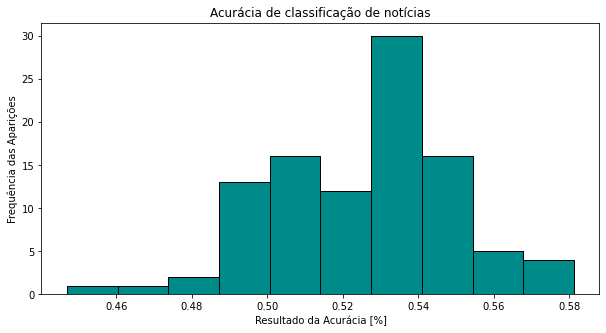

In [ ]:
plt.figure(figsize=(10, 5))
plt.title(f"Acurácia de classificação de notícias")
plt.ylabel("Frequência das Aparições")
plt.xlabel("Resultado da Acurácia [%]")
plt.hist(lista_acuracias, color='darkcyan', edgecolor='black',density=False)
plt.show()

#### Considerações Finais

É possível concluir que, caso realizássemos essa configuração apenas uma vez, como vista anteriormente no projeto, a chance de obtermos percentuais medianos de acertos é alta, assim como de obtermos percentuais mais baixos, como ilustrado no gráfico acima. Desse modo, é possível observar as desvantagens em 'rodar' os teste uma única vez, já que nem sempre essa prática retornará o melhor resultado possível. Logo, sempre que possível, deve-se realizar o processo de Validação Cruzada. 

#### Outras aplicações para Naive-Bayes 

Anomalias genéticas, hereditárias ou não, comumente aliam a grande dificuldade no tratamento a um fator muito importante à recuperação do paciente: a predição. Reconhecer uma anormalidade genética antes que ela se manifeste é quase sempre (se não sempre) muito complexo, o que, dentre muitas outras coisas, entrava o desenvolvimento de métodos preventivos para esses casos. A partir de uma base de dados que representasse os genomas de pessoas que sabidamente eram ou são afetadas com anomalias genéticas, a aplicação do classificador Naive-Bayes poderia ser útil na distinção de genomas que correm mais ou menos risco de manifestar anomalias relacionadas ao material genético. Além disso, a análise de Falsos Positivo e Falsos Negativo também poderia ser de extrema significância para a identificação de padrões que abrangessem o entendimento sobre essas anormalidades, como a inexpressividade, por exemplo, de anomalias em determinadas partes do DNA.

Outro cenário, poderia ser a utilização de Naive-Bayes em algoritmos de recomendação. Vamos utilizar como exemplo o Spotify. De acordo com os gêneros mais escutados semanalmente, a plataforma cria playlists personalizadas para cada tipo usuário, além de recomendar músicas semelhantes para o mesmo adicionar à playlist, satisfazendo seus gostos musicais e consequentemente mantendo o usuário mais conectado na plataforma.   

#### Como melhorar o classificador?

Apesar de possuirmos uma quantidade boa de notícias, poderíamos melhorar o modelo buscando atualizar, por meio de uma automação Web, a base de dados (diariamenteou semanalmente) com notícias variadas relacionadas ao governo Bolsonaro no site da IstoÉ Dinheiro. Com isso, é possível amenizar a ocorrência da base ser tangenciada para uma determinada categoria, como aconteceu nesse projeto com o Target 0 (NEUTRAS). Para isso, podemos aplicar alguns recursos da biblioteca Selenium, muito utilizada em aplicações de automação Web. Veja a documentação em: https://selenium-python.readthedocs.io/  

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**